# Proportion of reads mapping back to ORFs

In [1]:
%matplotlib inline
from glob import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

In [2]:
def parse_mapped_read_stats(rpkm):
    """
    Parse BBMap RPKM output file for basic mapping stats.
    """
    with open(rpkm) as f:
        reads_file = f.readline().strip().split()[1]
        reads = int(f.readline().strip().split()[1])
        mapped = int(f.readline().strip().split()[1])
        refseqs = int(f.readline().strip().split()[1])
        return reads_file, reads, mapped, refseqs               

In [3]:
rpkm_files = glob("/home/ctmr/projects/labcore/seq_depth/nextflow_output/metagenemark_contigs/*rpkm*")
mapped_read_stats = [parse_mapped_read_stats(fn) for fn in rpkm_files]
stats = pd.DataFrame(mapped_read_stats, columns=["Reads_file", "Reads", "Mapped_reads", "Refseqs"])
stats.head()

,Reads_file,Reads,Mapped_reads,Refseqs
0,biopsy_10000reads_1rep_1.fastq.gz,20000,45,19
1,saliva_100000reads_3rep_1.fastq.gz,200000,8071,1580
2,faeces_1000000reads_3rep_1.fastq.gz,2000000,1009241,61714
3,vag_10000reads_3rep_1.fastq.gz,20000,49,15
4,vag_10000000reads_2rep_1.fastq.gz,20000000,14267618,169647


In [4]:
stats["Proportion"] = stats["Mapped_reads"] / stats["Reads"]
stats["Sample_type"] = stats["Reads_file"].str.split("_", expand=True)[0]

In [5]:
sample_type_color = {st: idx for idx, st in enumerate(set(stats["Sample_type"]))}
cmap = plt.cm.get_cmap('viridis', 4)
colors = [cmap(sample_type_color[st]) for st in stats["Sample_type"]]

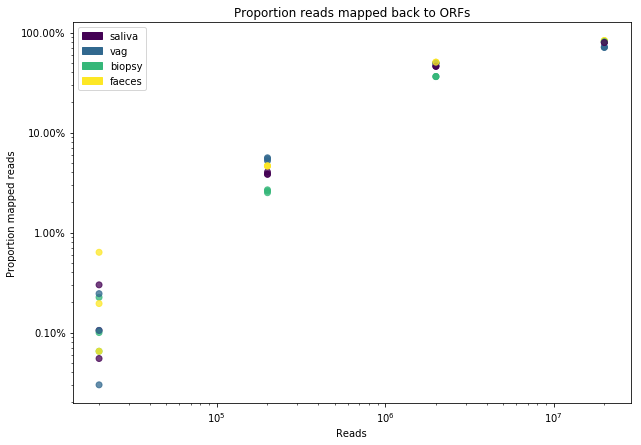

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
stats.plot.scatter(x="Reads", y="Proportion", ax=ax, c=colors, s=6**2, alpha=0.75, logy=True, logx=True)
_ = ax.set_title("Proportion reads mapped back to ORFs")
_ = ax.set_xlabel("Reads")
_ = ax.set_ylabel("Proportion mapped reads")
_ = ax.set_yticklabels(["{:3.2f}%".format(y*100) for y in ax.get_yticks()])

patches = [mpatches.Patch(color=cmap(sample_type_color[st]), label=st) for st in set(stats["Sample_type"])]
ax.legend(handles=patches)

fig.savefig("tigrfam_assembled_orfs/Proportion_reads_mapped_to_ORFs.png", bbox_inches='tight')
fig.savefig("tigrfam_assembled_orfs/Proportion_reads_mapped_to_ORFs.pdf", bbox_inches='tight')

# Comparing standard deviations of normalized read counts
Comparing standard deviations of normalized read counts mapped to TIGRFAMs using the two approaches: directly annotating reads, and annotating ORFs from assembled contigs and mapping reads back to the ORFs. 
Data copy-pasted from the two TIGRFAM statistics notebooks.

In [7]:
colnames = ["Seq_depth", "Sum_of_differences", "Stdev"]
reads_data = {
    "saliva": pd.DataFrame.from_records([
        (10000,               0.637957,            0.057933),
        (100000,              0.269771,            0.027893),
        (1000000,             0.301998,            0.031156),
        (10000000,            0.307361,            0.033357),
        ], columns=colnames),
    "vag": pd.DataFrame.from_records([
        (10000,                0.620333,            0.066180),
        (100000,               0.249111,            0.032459),
        (1000000,              0.293485,            0.029888),
        (10000000,             0.297372,            0.031253),
        ], columns=colnames),
    "faeces": pd.DataFrame.from_records([
        (10000,                0.437528,            0.044967),
        (100000,               0.245677,            0.026742),
        (1000000,              0.281057,            0.027186),
        (10000000,             0.299070,            0.029813),
        ], columns=colnames),
    "biopsy": pd.DataFrame.from_records([
        (10000,                0.672264,            0.057698),
        (100000,               0.266380,            0.019302),
        (1000000,              0.273471,            0.024236),
        (10000000,             0.276962,            0.026075),
        ], columns=colnames),
}


contigs_data ={
    "saliva": pd.DataFrame.from_records([
        (10000,                0.697493,            0.034664),
        (100000,               0.913490,            0.067012),
        (1000000,              0.244358,            0.010286),
        (10000000,             0.164202,            0.007529),
    ], columns=colnames),
    "vag": pd.DataFrame.from_records([
        (10000,                0.707973,            0.036182),
        (100000,               0.874643,            0.051575),
        (1000000,              0.296609,            0.014783),
        (10000000,             0.194888,            0.008594),
    ], columns=colnames),
   "faeces": pd.DataFrame.from_records([
       (10000,                0.707218,            0.034264),
       (100000,               0.929526,            0.055900),
       (1000000,              0.218954,            0.011264),
       (10000000,             0.172725,            0.007909),
   ], columns=colnames),
    "biopsy": pd.DataFrame.from_records([
        (10000,                0.670645,            0.030750),
        (100000,               0.805154,            0.047855),
        (1000000,              0.315076,            0.013368),
        (10000000,             0.173967,            0.006951),
    ], columns=colnames),
}

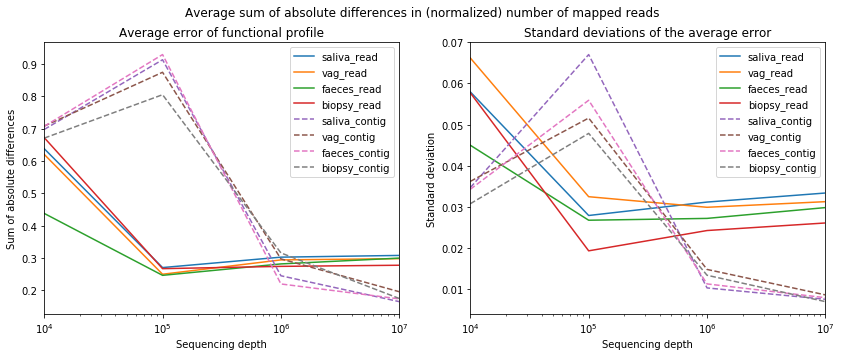

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

for sample_type, df in reads_data.items():
    df.plot("Seq_depth", "Sum_of_differences", logx=True, ax=ax1, label=sample_type+"_read")
    df.plot("Seq_depth", "Stdev", logx=True, ax=ax2, label=sample_type+"_read")
    
for sample_type, df in contigs_data.items():
    df.plot("Seq_depth", "Sum_of_differences", logx=True, ax=ax1, style="--", label=sample_type+"_contig")
    df.plot("Seq_depth", "Stdev", logx=True, ax=ax2, style="--", label=sample_type+"_contig")

fig.suptitle("Average sum of absolute differences in (normalized) number of mapped reads")
ax1.set_title("Average error of functional profile")
ax1.set_ylabel("Sum of absolute differences")
ax1.set_xlabel("Sequencing depth")

ax2.set_title("Standard deviations of the average error")
ax2.set_ylabel("Standard deviation")
ax2.set_xlabel("Sequencing depth")

fig.savefig("tigrfam_assembled_orfs/comparison_raw_reads_assembled_orfs.png", bbox_inches='tight')
fig.savefig("tigrfam_assembled_orfs/comparison_raw_reads_assembled_orfs.pdf", bbox_inches='tight')